# Importing the Data

In [290]:
import os
import numpy as np

In [291]:
# Making a single path for the data collections
HAM_DIR = os.path.join('C:/Users/ACER/Machine_Learning_Env/Spam_Classifier/HAM_PATH/', "easy_ham_2")
SPAM_DIR = os.path.join('C:/Users/ACER/Machine_Learning_Env/Spam_Classifier/SPAM_PATH/', "spam")

# Storing each file (email) to the respective list
ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20] 
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [292]:
len(ham_filenames)

1400

In [293]:
len(spam_filenames)

500

# Parsing the mail
Since the contents are byte-like object, there's need for parsing.

In [294]:
import email
import email.policy

**Function for the parsing**

In [295]:
def open_email(spam, filename):
    if spam:
        path = SPAM_DIR
    else:
        path = HAM_DIR
    with open(os.path.join(path,filename), 'rb') as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

**Storing the respective parsed email in a list**

In [296]:
ham_emails = [open_email(spam=False, filename=filename) for filename in ham_filenames]
spam_emails = [open_email(spam=True, filename=filename) for filename in spam_filenames]

In [297]:
print(ham_emails[0].get_content())

    Date:        Tue, 20 Aug 2002 17:27:47 -0500
    From:        Chris Garrigues <cwg-exmh@DeepEddy.Com>
    Message-ID:  <1029882468.3116.TMDA@deepeddy.vircio.com>


  | I'm hoping that all people with no additional sequences will notice are
  | purely cosmetic changes.

Well, first, when exmh (the latest one with your changes) starts, I get...

can't read "flist(totalcount,unseen)": no such element in array
    while executing
"if {$flist(totalcount,$mhProfile(unseen-sequence)) > 0} {
	FlagInner spool iconspool labelup
    } else {
	FlagInner down icondown labeldown
    }"
    (procedure "Flag_MsgSeen" line 3)
    invoked from within
"Flag_MsgSeen"
    (procedure "MsgSeen" line 8)
    invoked from within
"MsgSeen $msgid"
    (procedure "MsgShow" line 12)
    invoked from within
"MsgShow $msgid"
    (procedure "MsgChange" line 17)
    invoked from within
"MsgChange 4862 show"
    invoked from within
"time [list MsgChange $msgid $show"
    (procedure "Msg_Change" line 3)
    invoked f

**Multi-part email**

Some of the emails are multi-part i.e., some part of the mail might be plain text while some might be html, jpeg...

In [298]:
def email_part_check(email):
    if type(email) == str:
        return email
    check = email.get_payload()
    if isinstance(check, list):
        result = f"Multipart({','.join([email_part_check(part) for part in check])})"
        return result
#   The function is called within itself to work on the sub_email gotten from payload 
#   so that the content within them can be stored.
    else:
        result = email.get_content_type()
        return result

In [299]:
for email in ham_emails:
    print(email_part_check(email))

text/plain
Multipart(text/plain,application/pgp-signature)
Multipart(text/plain,application/pgp-signature)
Multipart(text/plain,application/pgp-signature)
Multipart(text/plain,application/pgp-signature)
Multipart(text/plain,application/pgp-signature)
Multipart(text/plain,application/pgp-signature)
Multipart(text/plain,application/pgp-signature)
Multipart(text/plain,application/pgp-signature)
text/plain
text/plain
Multipart(text/plain,application/pgp-signature)
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/pl

text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
Multipart(Multipart(text/plain,text/html),image/jpeg,image/gif,image/gif,image/gif,image/gif)
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text/plain
text

**Counting the number of each part that appears in all emails data**

In [300]:
from collections import Counter
def count_part(emails):
    part_count = Counter()
    for email in emails:
        part = email_part_check(email)
        part_count[part] += 1 
#       This counts the number of key and stored as a value in a dictionary with respect to the key like; {part:count}
        
    return part_count

In [301]:
count_part(ham_emails).most_common()

[('text/plain', 1343),
 ('Multipart(text/plain,application/pgp-signature)', 35),
 ('Multipart(text/plain,text/html)', 12),
 ('text/html', 2),
 ('Multipart(text/plain,application/x-patch)', 1),
 ('Multipart(Multipart(text/plain,Multipart(text/plain),text/plain),application/pgp-signature)',
  1),
 ('Multipart(text/plain,Multipart(text/plain))', 1),
 ('Multipart(Multipart(text/plain,text/html),image/jpeg,image/gif,image/gif,image/gif,image/gif)',
  1),
 ('Multipart(text/plain,application/ms-tnef)', 1),
 ('Multipart(text/plain,text/plain,text/plain)', 1),
 ('Multipart(text/plain,Multipart(text/plain,text/plain),text/rfc822-headers)',
  1),
 ('Multipart(text/plain,application/ms-tnef,text/plain)', 1)]

In [302]:
count_part(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('Multipart(text/plain,text/html)', 45),
 ('Multipart(text/html)', 20),
 ('Multipart(text/plain)', 19),
 ('Multipart(Multipart(text/html))', 5),
 ('Multipart(text/plain,image/jpeg)', 3),
 ('Multipart(text/html,application/octet-stream)', 2),
 ('Multipart(text/plain,application/octet-stream)', 1),
 ('Multipart(text/html,text/plain)', 1),
 ('Multipart(Multipart(text/html),application/octet-stream,image/jpeg)', 1),
 ('Multipart(Multipart(text/plain,text/html),image/gif)', 1),
 ('multipart/alternative', 1)]

# Splitting Train set and Test set from the data

In [303]:
X = np.array(ham_emails + spam_emails)
y = np.array([0]*len(ham_emails) + [1]*len(spam_emails)) # 0 for ham while 1 for spam

C:\Users\ACER\AppData\Local\Temp\ipykernel_8844\525685908.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.array(ham_emails + spam_emails)


In [304]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [305]:
len(X_train), len(y_train)

(1520, 1520)

# Converting the html to plain text Using RegEx

In [306]:
import re
from html import unescape

def html_to_plain_text(html):
    text = re.sub('<head.*?>.*?</head>', '', html, flags=re.M | re.S | re.I) #Drops the < head > section 
    text = re.sub('<a\s.*?>', ' HYPERLINK ', text, flags=re.M | re.S | re.I) # converts all < a > tags to the word HYPERLINK
    text = re.sub('<.*?>', '', text, flags=re.M | re.S) #gets rid of all HTML tags, leaving only the plain text
    text = re.sub(r'(\s*\n)+', '\n', text, flags=re.M | re.S) #replaces multiple newlines with single newlines
    return unescape(text) #unescapes html entities (such &gt; or &nbsp;)

In [307]:
html_spam_emails = [email for email in X_train[y_train==1]
                    if email_part_check(email) == "text/html"]
sample_html_spam = html_spam_emails[7]

In [308]:
print(html_to_plain_text(sample_html_spam.get_content()).strip())

Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the country
In our life and times, it's important to plan for
your family's future, while
being comfortable financially.  Choose the right
Life Insurance policy today.
Click the link below to compare the lowest rates
and save up to 75%
 HYPERLINK
COMPARE YOUR COVERAGE
You'll be able to compare rates and get a free
application in less than a minute!
*Get your FREE instant quotes...
*Compare the lowest prices, then...
*Select a company and Apply Online.
 HYPERLINK
GET A FREE QUOTE NOW!
You can't predict the future, but you can always
prepare for it.
 HYPERLINK to be
excluded from future contacts
tuckers


**Converting any email format to plain text:**

In [309]:
def email_to_text(email):
    html = None
    for part in email.walk():
        ctype = part.get_content_type()
        if not ctype in ("text/plain", "text/html"): 
            continue
#       i.e., if the content type is neither the given two, 
#       it should continue with another part(i.e., continue the loop with another part) 
#       else, continue with the current loop.
        try:
            content = part.get_content()
        except: # in case of encoding issues
            content = str(part.get_payload())
        if ctype == "text/plain":
            return content
        else:
            html = content
    if html:
        return html_to_plain_text(html)

In [310]:
print(email_to_text(sample_html_spam)[:], "...")


Save up to
75% on your Term Life
Insurance!
Compare rates from top insurance companies around
the country
In our life and times, it's important to plan for
your family's future, while
being comfortable financially.  Choose the right
Life Insurance policy today.
Click the link below to compare the lowest rates
and save up to 75%
 HYPERLINK
COMPARE YOUR COVERAGE
You'll be able to compare rates and get a free
application in less than a minute!
*Get your FREE instant quotes...
*Compare the lowest prices, then...
*Select a company and Apply Online.
 HYPERLINK
GET A FREE QUOTE NOW!
You can't predict the future, but you can always
prepare for it.
 HYPERLINK to be
excluded from future contacts
tuckers
 ...


**Transformer for counting word's frequency:**

In [311]:
import urlextract
import nltk #nltk --> Natural Language Toolkit
stemmer = nltk.PorterStemmer() # Stemming each word i.e., getting the root for each word in an email
url_extractor = urlextract.URLExtract() #For extracting url in each email

In [312]:
from sklearn.base import BaseEstimator, TransformerMixin

class EmailToWordCounterTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, strip_headers=True, lower_case=True, remove_punctuation=True,
                 replace_urls=True, replace_numbers=True, stemming=True):
        self.strip_headers = strip_headers
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.replace_urls = replace_urls
        self.replace_numbers = replace_numbers
        self.stemming = stemming
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        X_transformed = []
        for email in X:
            text = email_to_text(email) or ''  #This transform the mail to text
#           NB: the ' or '' ' used above is for the case of Nonetype email i.e email that has nothing inside
#           A problem might arise in the following code if it is not taken care of as 'nothing' cannot take lower/upper method.
            if self.lower_case:
                text = text.lower() #Converting all the cases in the test to lower case
            if self.replace_urls and url_extractor is not None:
                urls = list(set(url_extractor.find_urls(text))) 
                #Extracting all possible url in the text, making sure it is not repeated and stored in a list
                urls.sort(key=lambda url: len(url), reverse=True) #Sorting the list of urls by their length
                for url in urls:
                    text = text.replace(url, " URL ") #Replacing all urls found in the text to the string 'URL'
            if self.replace_numbers:
                text = re.sub(r'\d+(?:\.\d*(?:[eE]\d+))?', 'NUMBER', text) 
                #Using RegEx to change all the numbers in the text to the string 'NUMBER'
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M) 
                #Using RegEx to replace all punctuations in the text with empty space
            word_counts = Counter(text.split()) 
#           Split the text by the spaces between each word and count the frequency of each word then, 
#            store the word and its count in a dictionary (That is what Counter() does).
            if self.stemming and stemmer is not None:
                stemmed_word_counts = Counter()
                for word, count in word_counts.items():
                    stemmed_word = stemmer.stem(word) #This give the root of each word using nltk library
                    stemmed_word_counts[stemmed_word] += count #Frequency of the stemmed word
                word_counts = stemmed_word_counts
            X_transformed.append(word_counts)
        return np.array(X_transformed)

In [313]:
X_few = X_train[:1]
X_few_wordcounts = EmailToWordCounterTransformer().fit_transform(X_few)
X_few_wordcounts

array([Counter({'camram': 18, 'the': 16, 'number': 14, 'to': 14, 'spam': 9, 'org': 9, 'a': 9, 'and': 8, 'framework': 7, 'in': 7, 'for': 6, 'of': 6, 'it': 6, 'forward': 5, 'list': 5, 'mail': 5, 'adam': 5, 'address': 5, 'text': 4, 'usual': 4, 'use': 4, 'work': 4, 'e': 4, 'they': 4, 'email': 4, 'espac': 3, 'net': 3, 'subject': 3, 'hashcash': 3, 'is': 3, 'url': 3, 'with': 3, 'end': 3, 'begin': 2, 'date': 2, 'aug': 2, 'from': 2, 'feargha': 2, 'com': 2, 'anoth': 2, 'relat': 2, 'repli': 2, 'sender': 2, 'help': 2, 'by': 2, 'deliv': 2, 'back': 2, 'cypherspac': 2, 'like': 2, 'proof': 2, 'junk': 2, 'look': 2, 'at': 2, 'propos': 2, 'proxi': 2, 'etc': 2, 'architectur': 2, 'on': 2, 'white': 2, 'target': 2, 'revok': 2, 'ident': 2, 'lwpa': 2, 'what': 2, 'postag': 2, 'free': 2, 'token': 2, 'you': 2, 'can': 2, 'will': 2, 'still': 2, 'some': 2, 'corpor': 2, 'unsubscrib': 2, 'sun': 1, 'mckay': 1, 'mac': 1, 'fwd': 1, 'peopl': 1, 'contact': 1, 'run': 1, 'ezmlm': 1, 'x': 1, 'no': 1, 'archiv': 1, 'ye': 1, 'mo

# Converting the word's counts to vector

**A transformer that creates a Vocabulary list (i.e., the most common words) and then use the vocabulary to convert the word's count to vector:**

In [314]:
from scipy.sparse import csr_matrix

class WordCounterToVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, vocabulary_size=1000):
        self.vocabulary_size = vocabulary_size
    def fit(self, X, y=None):
        total_count = Counter()
        for word_count in X:
            for word, count in word_count.items():
                total_count[word] += min(count, 10)
        most_common = total_count.most_common()[:self.vocabulary_size]
        self.vocabulary_ = {word: index + 1 for index, (word, count) in enumerate(most_common)}
        return self
    def transform(self, X, y=None):
        rows = []
        cols = []
        data = []
        for row, word_count in enumerate(X):
            for word, count in word_count.items():
                rows.append(row)
                cols.append(self.vocabulary_.get(word, 0))
                data.append(count)
        return csr_matrix((data, (rows, cols)), shape=(len(X), self.vocabulary_size + 1))

In [315]:
vocab_transformer = WordCounterToVectorTransformer(vocabulary_size=10)
X_few_vectors = vocab_transformer.fit_transform(X_few_wordcounts)
X_few_vectors

<1x11 sparse matrix of type '<class 'numpy.intc'>'
	with 11 stored elements in Compressed Sparse Row format>

**So, let's check out the words in the vocabulary list:**

In [316]:
vocab_transformer.vocabulary_

{'number': 1,
 'to': 2,
 'camram': 3,
 'the': 4,
 'spam': 5,
 'org': 6,
 'a': 7,
 'and': 8,
 'framework': 9,
 'in': 10}

In [317]:
X_few_vectors.toarray()

array([[296,  14,  14,  18,  16,   9,   9,   9,   8,   7,   7]],
      dtype=int32)

# Creating a Pipeline for all the process

In [318]:
from sklearn.pipeline import Pipeline

In [319]:
preprocess_pipeline = Pipeline([
    ("email_to_wordcount", EmailToWordCounterTransformer()),
    ("wordcount_to_vector", WordCounterToVectorTransformer())
])
X_train_transformed = preprocess_pipeline.fit_transform(X_train)
X_test_transformed = preprocess_pipeline.transform(X_test)

# Training a model

**LogisticRegression**

In [320]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,cross_val_predict

log_clf = LogisticRegression(random_state=42)
log_clf.fit(X_train_transformed, y_train)
score = cross_val_score(log_clf, X_train_transformed, y_train, cv=3, verbose=3)
score.mean()

C:\Users\ACER\Untitled Folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\ACER\Untitled Folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:


[CV] END ................................ score: (test=0.978) total time=   0.1s
[CV] END ................................ score: (test=0.968) total time=   0.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
C:\Users\ACER\Untitled Folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] END ................................ score: (test=0.982) total time=   0.1s


C:\Users\ACER\Untitled Folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s finished


0.9763196669551184

In [321]:
log_clf.predict(X_test_transformed[24]), y_test[24]

(array([1]), 1)

In [322]:
from sklearn.metrics import precision_score, recall_score
y_pred = log_clf.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 97.22%
Recall: 96.33%


# Another Model -----> KNeighbours

In [323]:
from sklearn.neighbors import KNeighborsClassifier

In [324]:
kn = KNeighborsClassifier()
kn.fit(X_train_transformed, y_train)
kn_scores = cross_val_score(kn,X_train_transformed,y_train,cv=3)
kn_scores.mean()

0.899336820741503

In [325]:
y_pred = kn.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 96.10%
Recall: 67.89%


# Another Model -----> SVM

In [326]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(X_train_transformed, y_train)

SVC(kernel='linear')

In [327]:
svc_scores = cross_val_score(svc,X_train_transformed,y_train,cv=3)
svc_scores.mean()

0.9585616910031626

In [328]:
y_pred = svc.predict(X_test_transformed)

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_pred)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_pred)))

Precision: 94.69%
Recall: 98.17%


# Seems like SVM is better than LogisticRegression, the recall_score is a bit more better.

**Checking their roc_curve for comparison**

In [329]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

X_pred_log = cross_val_predict(log_clf,X_train_transformed, y_train, cv=3,method='decision_function')
X_pred_svc = cross_val_predict(svc,X_train_transformed, y_train, cv=3,method='decision_function')

C:\Users\ACER\Untitled Folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ACER\Untitled Folder\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [330]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate',fontsize=16)
    plt.ylabel('True Positive Rate',fontsize=16)

In [331]:
fpr_log, tpr_log, thresholds = roc_curve(y_train, X_pred_log)
fpr_svc, tpr_svc, thresholds = roc_curve(y_train, X_pred_svc)

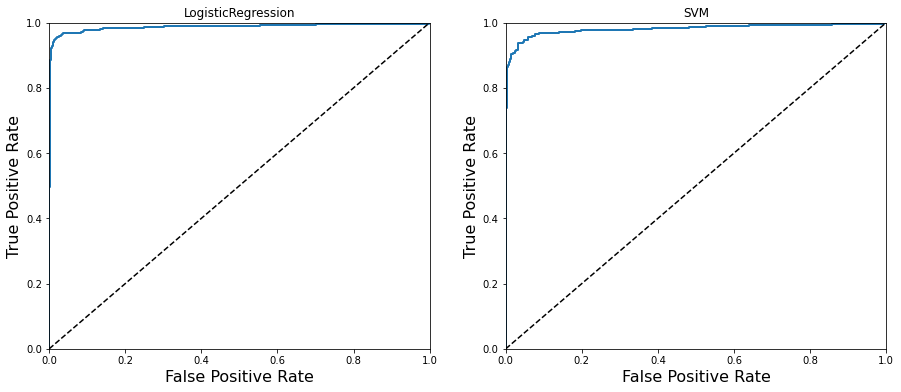

In [332]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title('LogisticRegression')
plot_roc_curve(fpr_log, tpr_log)
plt.subplot(1,2,2)
plt.title('SVM')
plot_roc_curve(fpr_svc, tpr_svc)

**NB: From the two diagram above, LogisticRegression roc_curve is more far away from the straightline and closer to the left-top corner**

**Checking for the roc_auc_score**

In [333]:
from sklearn.metrics import roc_auc_score

In [334]:
roc_lon_clf = "{:.2f}".format(100 * roc_auc_score(y_train,X_pred_log))

In [335]:
roc_svc =  "{:.2f}".format(100 * roc_auc_score(y_train,X_pred_svc))

In [336]:
import pandas as pd
pd.DataFrame({'LogisticRegression':roc_lon_clf, 'SVM': roc_svc},index=['roc_auc_score'])

,LogisticRegression,SVM
roc_auc_score,98.68,98.00


**OBVIOUSLY, LOGISTICREGRESSION IS BETTER!**

# **Deploying model:**

In [337]:
start =0
end =10
prediction = log_clf.predict(X_test_transformed[start:end+1])
classification = ['spam' if i == 1 else 'ham' for i in prediction]
pd.DataFrame({'Prediction': prediction,
              'Pred_Classification':classification,
              'Correction': y_test[start:end+1], 
              'Corr_Classification':['spam' if i == 1 else 'ham' for i in y_test[start:end+1]] }, 
             index= [i for i in range(start, end+1)])

,Prediction,Pred_Classification,Correction,Corr_Classification
0,0,ham,0,ham
1,0,ham,0,ham
2,0,ham,0,ham
3,0,ham,0,ham
4,0,ham,0,ham
5,0,ham,0,ham
6,0,ham,0,ham
7,0,ham,0,ham
8,0,ham,0,ham
9,0,ham,0,ham
